# Clustering of Morphological Trajectory Response to Therapies

In [2]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import os
from scipy import stats
import os
from glob import glob
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import preprocessing
import joblib
import cv2

In [3]:
data=pd.read_csv('\\path to senotherapy dataset csv with particles starting in subtype 7,10,11 with cell ID as index \\')
# each column other than data is a time point that captures a KMEANS morphology 

In [4]:
# Creating a colormap of morphological transitions



import matplotlib.colors as cm
colors = [cm.to_hex(plt.cm.tab20(i)) for i in range(20)]
from matplotlib.colors import ListedColormap

cmap_cluster=['black']
cmap_cluster+=colors
cmap_cluster=cmap_cluster[0:12]
cmap_values=[0,1,2,3,4,5,6,7,8,9,10,11]
cmap_dict = dict(zip(cmap_values, cmap_cluster))
cmap_custom = ListedColormap([cmap_dict.get(value, 'gray') for value in cmap_values])

In [5]:
#creating the 

grapher=data.drop(['Treatment'],axis=1)
colors = {'Untreated': 'blue', 'DQ': 'red'}
row_colors = data['Treatment'].map(colors)

C:\Users\Jude\anaconda3\envs\base2_2\lib\site-packages\seaborn\matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


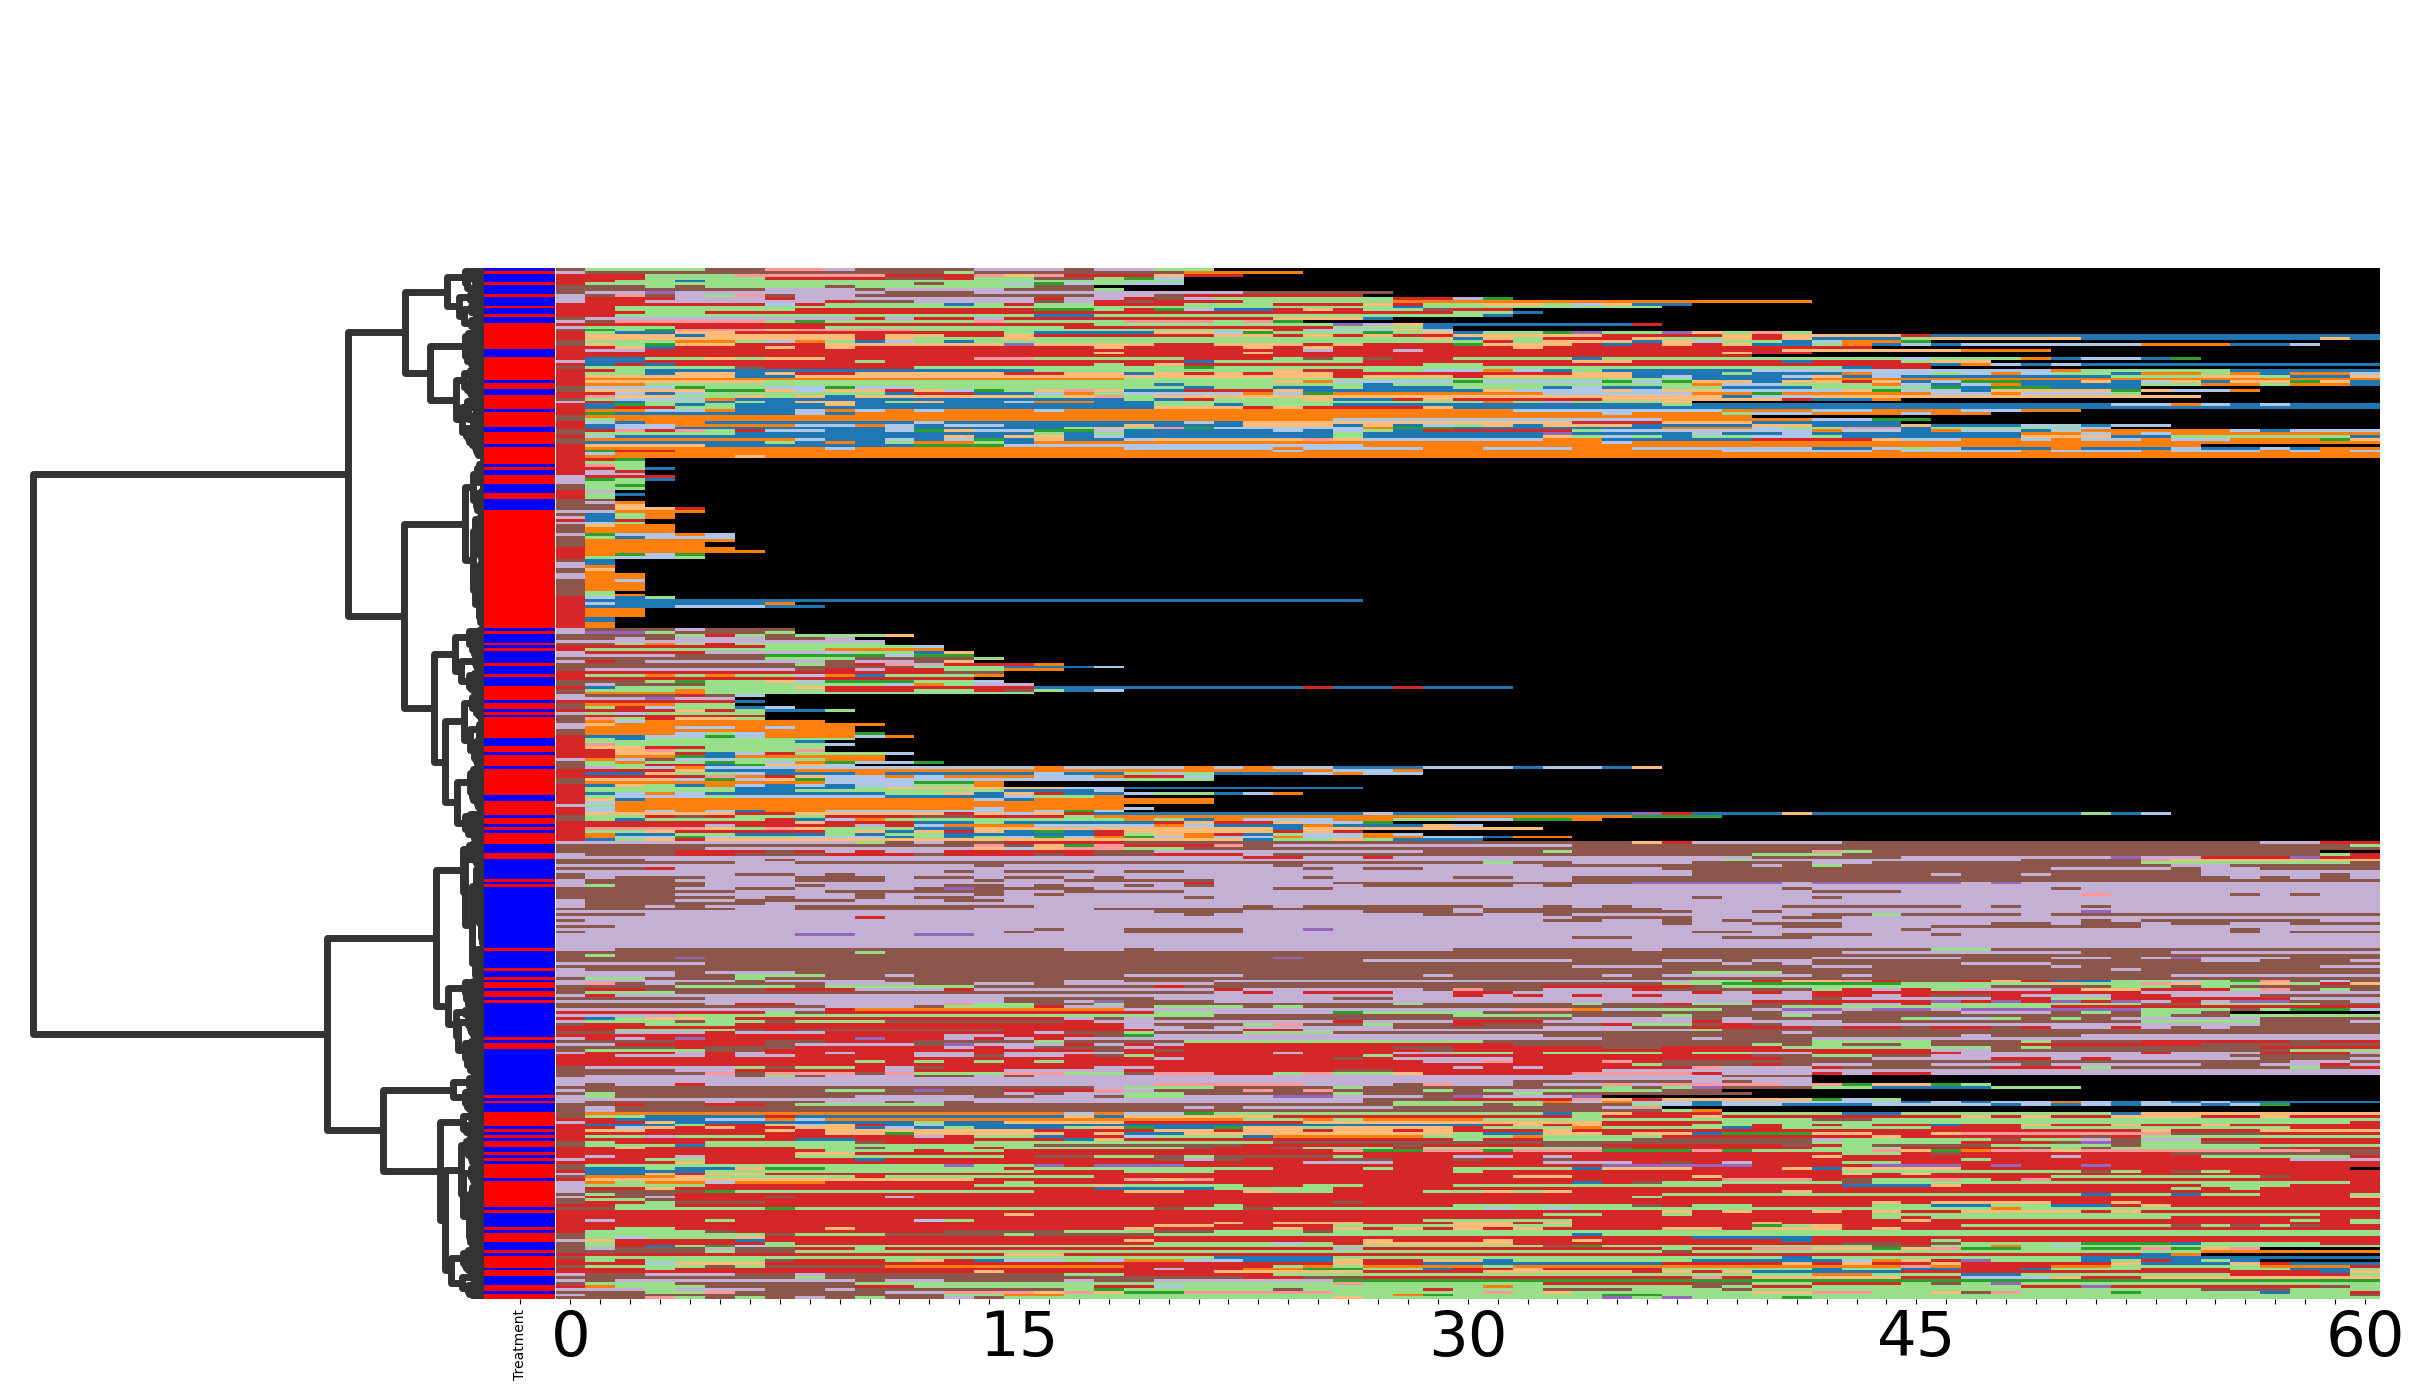

In [6]:
Clustering= sns.clustermap(grapher,row_colors=row_colors,figsize=(24,14),row_cluster=True,cmap=cmap_custom,col_cluster=False,method='ward', linewidths=0, linecolor='white',cbar_kws={"orientation": "horizontal",'ticks':[-4,0,4]},
                          tree_kws=dict(linewidths=5),yticklabels=False)
Clustering.ax_heatmap.collections[0].colorbar.remove()
Clustering.ax_heatmap.set_xticklabels(Clustering.ax_heatmap.get_xmajorticklabels(), fontsize = 45, rotation=0)
Clustering.ax_heatmap.set_yticklabels(Clustering.ax_heatmap.get_ymajorticklabels(), fontsize = 25,va='center', rotation = 0)
xtick_labels = Clustering.ax_heatmap.get_xticklabels()





# Keep only the first and last tick labels
num_labels = len(xtick_labels)
desired_ticks = [0,15,30,45, num_labels - 1]
new_xtick_labels = [xtick_labels[i] if i in desired_ticks else '' for i in range(num_labels)]

# Set the new tick labels
Clustering.ax_heatmap.set_xticklabels(new_xtick_labels)

plt.show()

# Try to pull apart the dendrogram 

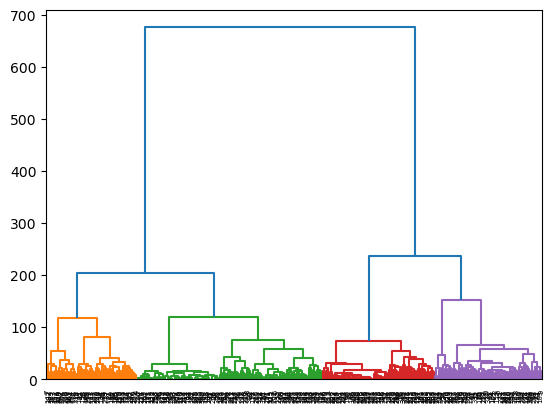

In [8]:
# Get dendrogram data
from scipy.cluster import hierarchy

dendrogram_row = hierarchy.dendrogram(Clustering.dendrogram_row.linkage,
                                     labels=Clustering.dendrogram_row.reordered_ind,color_threshold=190)


In [9]:
original_correlation_matrix = grapher.iloc[Clustering.dendrogram_row.reordered_ind]
original_correlation_matrix['Color']=dendrogram_row['leaves_color_list'] #reindex

C:\Users\Jude\AppData\Local\Temp\ipykernel_22444\3631786543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_correlation_matrix['Color']=dendrogram_row['leaves_color_list']


C:\Users\Jude\anaconda3\envs\base2_2\lib\site-packages\seaborn\matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


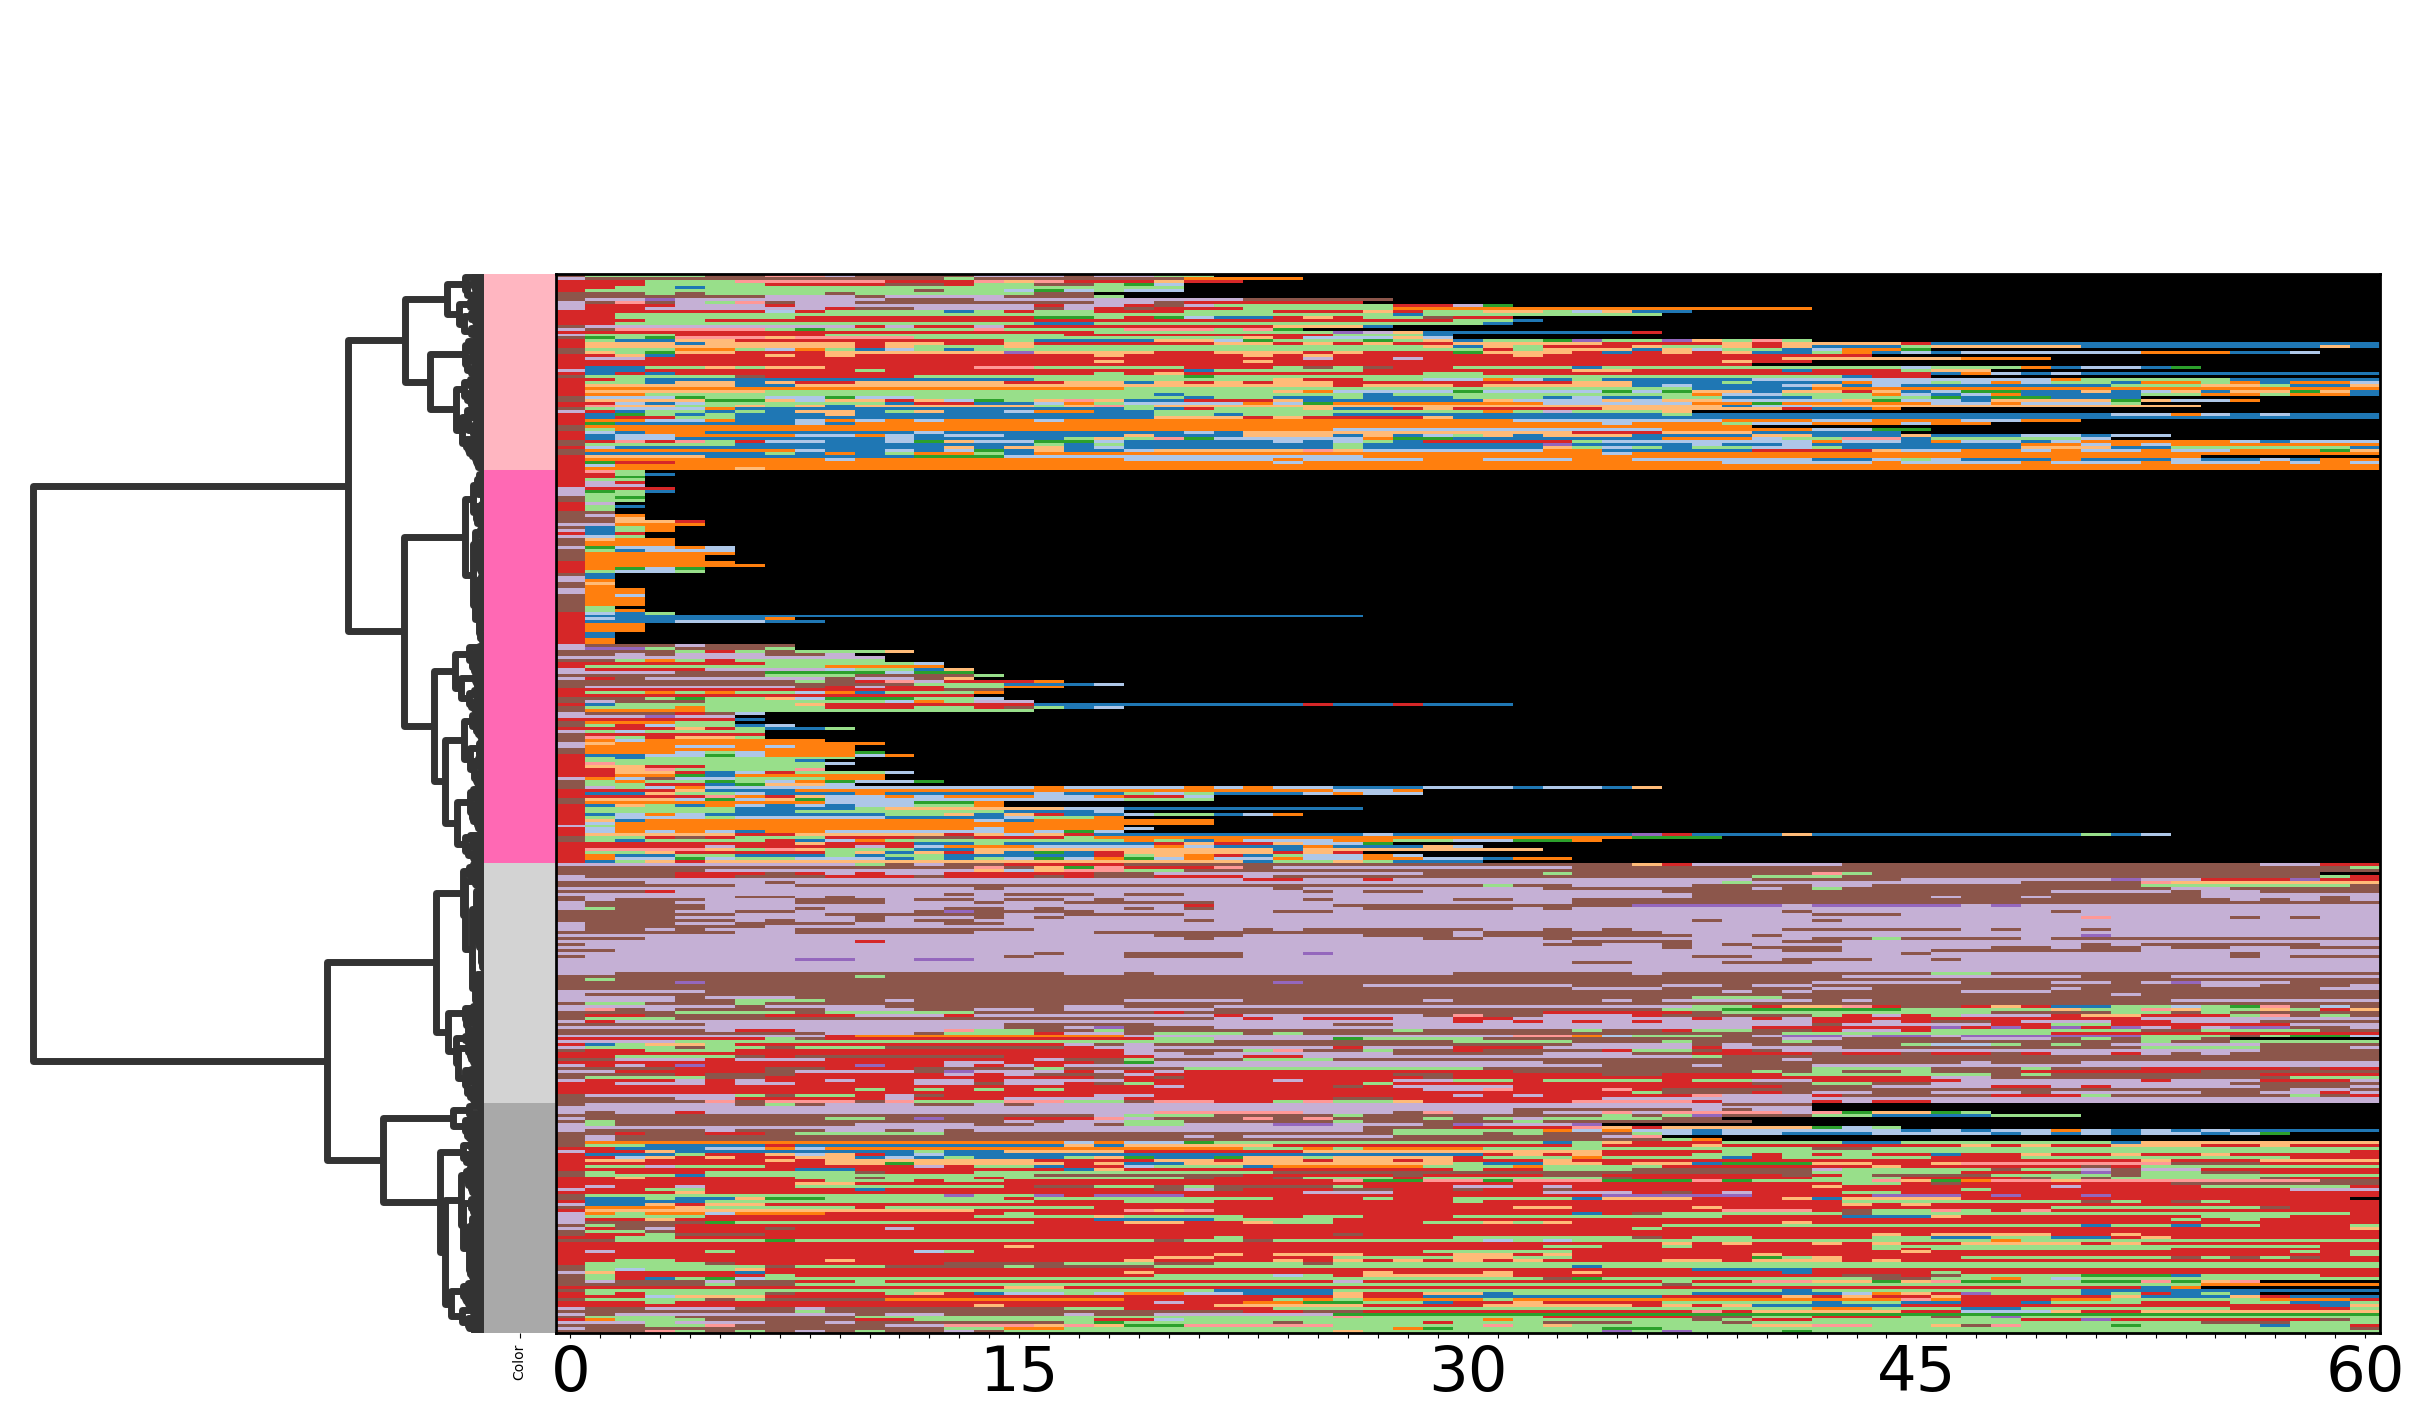

In [10]:
colors = {'C1': '#FFB6C1', 'C2': '#FF69B4','C3':'#D3D3D3','C4':'#A9A9A9'}# recolor dendrogram
row_colors = original_correlation_matrix['Color'].map(colors)
row_colors
grapher_o=original_correlation_matrix.drop(['Color'],axis=1)
Clustering= sns.clustermap(grapher_o,row_colors=row_colors,figsize=(24,14),row_cluster=True,cmap=cmap_custom,col_cluster=False,method='ward', linewidths=0, linecolor='white',cbar_kws={"orientation": "horizontal",'ticks':[-4,0,4]},
                          tree_kws=dict(linewidths=5),yticklabels=False)
Clustering.ax_heatmap.collections[0].colorbar.remove()
Clustering.ax_heatmap.set_xticklabels(Clustering.ax_heatmap.get_xmajorticklabels(), fontsize = 45, rotation=0)
Clustering.ax_heatmap.set_yticklabels(Clustering.ax_heatmap.get_ymajorticklabels(), fontsize = 25,va='center', rotation = 0)
xtick_labels = Clustering.ax_heatmap.get_xticklabels()

ax = Clustering.ax_heatmap
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2)


# Set the new tick labels
Clustering.ax_heatmap.set_xticklabels(new_xtick_labels)

plt.show()